# 02-1 훈련 세트와 테스트 세트

### 지도 학습과 비지도 학습
- 머신러닝 알고리즘은 크게 지도 학습과 비지도 학습으로 나눌 수 있습니다.
- 지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요합니다.
- 입력 데이터만 있을 때는 비지도 학습 알고리즘을 사용합니다.

### 훈련 세트와 테스트 세트
- test set : 평가에 사용되는 데이터(전체 데이터에서 20~30%를 테스트 세트로 사용)
- train set : 훈련에 사용되는 데이터
- 1장에서의 문제점 : 훈련에 사용한 데이터로 모델을 평가하였습니다. 훈련할 때 사용하지 않은 데이터로 평가해야 합니다. 이를 위해 훈련 데이터에서 일부를 뗴어 내어 테스트 세트로 사용해야합니다.
- 도미와 빙어의 데이터 https://gist.github.com/rickiepark/b90b9f725890653e69a1a52943671c62

In [4]:
# 도미와 빙어의 데이터
ish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
# 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트로 만들기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [9]:
# 객체 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [11]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [12]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [13]:
# 앞에서 35개를 훈련 세트로
train_input = fish_data[:35]
train_target = fish_target[:35]
# 뒤에서 14개를 테스트 세트로
test_input = fish_data[35:]
test_target = fish_target[35:]

In [14]:
# 훈련세트에 빙어 데이터가 없어서 학습을 하지 못함 - 샘플링 편향 발생
kn = kn.fit(train_input,train_target)
kn.score(test_input, test_target)

0.0

### 샘플링 편향
- 샘플링 편향은 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤을때를 말합니다.
- 훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 훈련 세트와 테스트 세트를 만들어야 합니다.

### 넘파이
- 넘파이(numpy)는 파이썬의 대표적인 배열(array) 라이브러리입니다.

In [15]:
import numpy as np

In [16]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [18]:
print(input_arr[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [20]:
print(input_arr.shape) # (샘플 수, 특성 수)

(49, 2)


In [21]:
# 무작위 랜덤
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index) # index 내 랜덤으로 섞는다

In [22]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [30]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [31]:
print(input_arr[13], train_input[0]) # 잘 섞인 것을 확인

[ 32. 340.] [ 32. 340.]


In [32]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

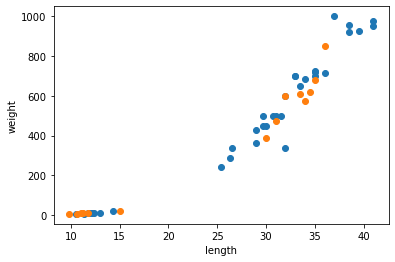

In [33]:
# 실제로 램덤하게 분포하는지 시각화해보기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 두 번째 머신러닝 프로그램

In [35]:
kn = kn.fit(train_input, train_target)

In [36]:
kn.score(test_input, test_target) # 훈련데이터와 테스트데이터를 나눠서 모델링 한 결과 모두 잘 예측했다

1.0

In [37]:
# 테스트 세트의 예측 결과 확인
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [38]:
# 실제 데이터의 결과
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### 핵심 패키지와 함수
#### numpy
- seed()는 넘파이에서 난수를 생성하기 위한 정수 초깃값을 지정합니다. 초깃값이 같으면 동일한 난수를 뽑을 수 있습니다.
- arange()는 일정한 간격의 정수 또는 실수 배열을 만듭니다. 기본 간격은 1입니다.

In [39]:
print(np.arange(3))

[0 1 2]


In [40]:
print(np.arange(1,3))

[1 2]


In [42]:
print(np.arange(1, 3, 0.2)) # 1부터 3까지 0.2단위로 나태내어라(마지막 3은 포함 x)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]


- shuffle()은 주어진 배열을 랜덤하게 섞습니다. 첫 번째 축(행)에 대해서만 섞습니다.

In [50]:
arr = np.array([[1,2], [3, 4], [5,6]])
np.random.shuffle(arr)
print(arr) # 데이터가 작으면 섞어도 원상태일 수 있다

[[3 4]
 [1 2]
 [5 6]]


# 02-2 데이터 전처리

- 문제점 발생 : 길이가 25cm이고 무게가 150g이면 도미인데 우리 모델은 빙어라고 예측한다

### 넘파이로 데이터 준비하기
- 도미와 빙어의 데이터 https://gist.github.com/rickiepark/b90b9f725890653e69a1a52943671c62

In [55]:
# 도미와 빙어의 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [52]:
import numpy as np

In [54]:
# 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
np.column_stack(([1, 2, 3], [4, 5, 6])) 

array([[1, 4],
       [2, 5],
       [3, 6]])

In [58]:
fish_data = np.column_stack((fish_length, fish_weight))

In [59]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [61]:
# 이전에 target을 만들때 list에서 곱하기로 표현했는데 numpy에서 제공하는 방법: npones, np.zeros
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [65]:
# concatenate 옆으로 계속해서 이어 붙여준다, (list에서 + 기능이라고 생각) 
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [66]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [69]:
# 앞에서는 넘파이 배열의 인덱스를 직접 섞어서 훈련, 테스트 세트로 나뉘었지만 사이킷런으로 나누기
from sklearn.model_selection import train_test_split

In [77]:
# 기본적으로 25%를 테스트 세트로 떼어 냅니다.
train_input, test_input, train_target, test_target =train_test_split(fish_data, fish_target, random_state = 42)

In [78]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [79]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [82]:
# 13개의 테스트 중에 10개가 도미(1), 3개가 빙어(0)
# 원래 도미와 빙어의 개수가 35개, 14개이므로 두 생선의 비율은 2.5:1
# 이 테스트 세트의 도미와 빙어의 비율은 3.3:1 
# 약간의 샘플링 편향이 발생!!!
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [83]:
# train_test_split 에서 strtify 매개변수로 비율에 맞게 데이터를 나눌 수 있다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [84]:
print(test_target) # 2.25:1 이 된것을 확인

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 수상한 도미 한 마리

In [87]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [89]:
print(kn.predict([[5, 150]])) # 도미인데 빙어로 예측

[0.]


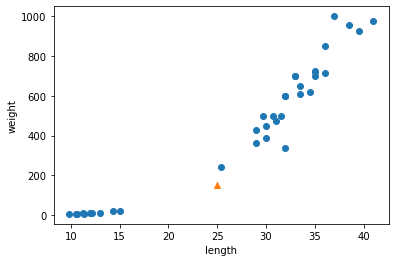

In [90]:
# 시각화 해보자
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [92]:
# KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃을 반환됩니다.
distances, indexes = kn.kneighbors([[25, 150]])

In [94]:
# 근처 5개를 추가로 시각해보자

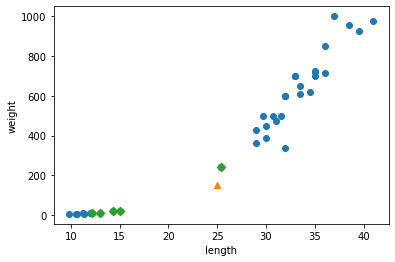

In [96]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0],train_input[indexes, 1], marker = "D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [99]:
# 직접 주변 데이터 확인
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [100]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

In [102]:
print(distances) # 이웃 샘플까지의 거리

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 기준을 맞춰라
- x, y축 범위가 다르다
- 두 특성의 값(길이와 무게)의 범위가 매우 다르다. 이를 두 특성의 스케일(scale)이 다르다고도 말합니다.
- 알고리즘이 거리 기반일 때 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰야 합니다. 이런 작업을 데이터 전처리(data preprocessing)라고 부릅니다.
- 가장 널리 사용하는 전처리 방법 중 하나는 표준점수(standard score)입니다.

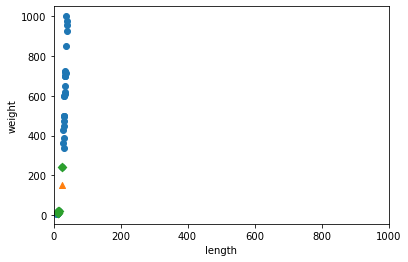

In [103]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0],train_input[indexes, 1], marker = "D")
plt.xlim(0,1000) # x, y축 범위를 동일하게 그리기 위해 x축 범위 수정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 이렇게 보니 가까운순이 제대로 된거 같다...

In [107]:
# 표준점수
mean = np.mean(train_input, axis = 0) # axis에 따라 연산이 열방향, 행방향 결정
std = np.std(train_input, axis =0)

In [108]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [110]:
train_scaled = (train_input - mean) / std

### 전처리 데이터로 모델 훈련하기

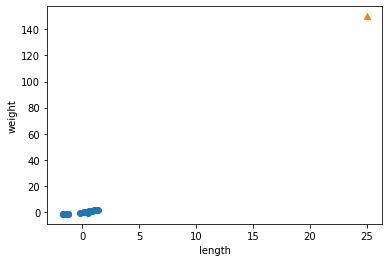

In [112]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 훈련데이터도 스케일해줘야한다. 하지 않으면 동떨어지는 현상 발견
# 주의!! 이때 테스트데이터를 스케일링할때 훈련데이터의 평균과 표준편차로 스케일링 해야한다는점 

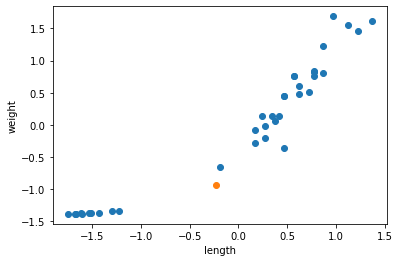

In [114]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 두 특성이 스케일링 한 후 범위가 비슷(동일)해진 것을 확인 이젠 제대로 분류할 것으로 예상
# 다시 모델링 해보자

In [115]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [117]:
test_scaled = (test_input - mean) / std #주의!! 이때 테스트데이터를 스케일링할때 훈련데이터의 평균과 표준편차로 스케일링 해야한다는점 

In [118]:
kn.score(test_scaled, test_target)

1.0

In [120]:
print(kn.predict([new])) # 이젠 길이 25, 무게 150인 물고기(도미)를 도미로 제대로 분류하는 것을 확인

[1.]


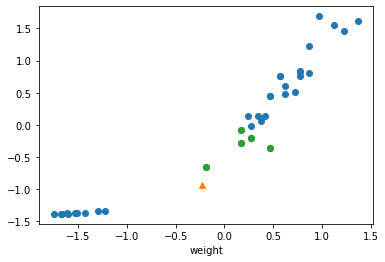

In [126]:
# 최근점 이웃을 5개를 구해서 시각화 해보자
# 새로운 물고기에 대해서 가까운 5개는 모두 도미인것을 확인
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker ="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1])
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

### 키워드로 끝나는 핵심 포인트
- 데이터 전처리는 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하느 단계를 말합니다. 때로는 데이터 전처리에 많은 시간이 소모되기도 합니다.
- 표준점수는 훈련 세트의 스케일을 바꾸는 대표적인 방법 중 하나입니다. 표준점수를 얻으려면 특성의 평균을 빼고 표준편차로 나눕니다. 반드시 훈련 세트의 평균과 표준편차로 테스트 세트를 바꿔야 합니다.
- 브로드 캐스팅은 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능입니다.

### 핵심 패키지와 함수
#### scikit-learn
- train_test_split()은 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수입니다. 
    - 테스트 세트로 나눌 비율은 test_size 매개변수에서 지정할 수 있으며 기본값은 0.25(25%)입니다. 
    - stratify 매개변수는 클래스 비율에 맞게 훈련 세트와 테스트 세트를 나눕니다.
- kneighbors()는 k-최근접 이웃 객체의 메서드입니다. 이 메서드는 입력한 데이터에 가장 가까운 이웃을 찾아 거리와 이웃 샘플의 인데스를 반환합니다. 
    - n_neighbors 매개변수에서 다르게 지정할 수도 있습니다. 
    - return_distance 매개변수를 Fasle로 지정하면 이웃 샘플의 인덱스만 반환하고 거리는 반환하지 않습니다. 기본값은 True입니다.
